In [66]:
import math
import numpy as np
from scipy.stats import norm

In [68]:
def bsm_price(St,t,T,K,r,sigma):
    dt = T-t
    if dt == 0:
        return max(0,St-K) , max(0,K-St)
        
    d1 = (math.log(St/K) + (r + 0.5 * sigma * sigma)*dt ) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma*np.sqrt(dt)
    
    phi_d1 = norm.cdf(d1)
    phi_d2 = norm.cdf(d2)

    mphi_d1 = norm.cdf(-d1)
    mphi_d2 = norm.cdf(-d2)
    
    C = St * phi_d1 - K * np.exp(-r*dt)  * phi_d2
    P = K * np.exp(-r*(dt)) * mphi_d2 - St * mphi_d1

    return C,P

    

In [70]:
call,put = bsm_price(1,0,1,1,0.05,0.6)
print("Price of Call Option: ", call)
print("Price of Put Option: ", put)


Price of Call Option:  0.255232056656095
Price of Put Option:  0.20646148115680896


In [72]:
def plot_2d(St_vals,t_vals,price_list,ylbl,ttle):
   for t in range(len(t_vals)):
       call_price = price_list[t]
       plt.plot(St_vals,call_price,label = f't = {t}')
   plt.xlabel('St values')
   plt.ylabel(ylbl)
   plt.title(ttle)
   plt.legend()
   plt.grid()
   plt.show()


In [74]:
def plot_3d(St_values, t_values, prices_list, zlabel, str):
    x,y,z = [],[],[]
    for i in range(len(t_values)):
        for j in range(len(St_values)):
            x.append(St_values[j])
            y.append(t_values[i])
            z.append(prices_list[i][j])
    
    ax = plt.axes(projection='3d')
    ax.scatter3D(x,y,z)
    ax.set_xlabel('St_values')
    ax.set_ylabel('t_values')
    ax.set_zlabel(zlabel)
    plt.title(str)
    plt.show()
    

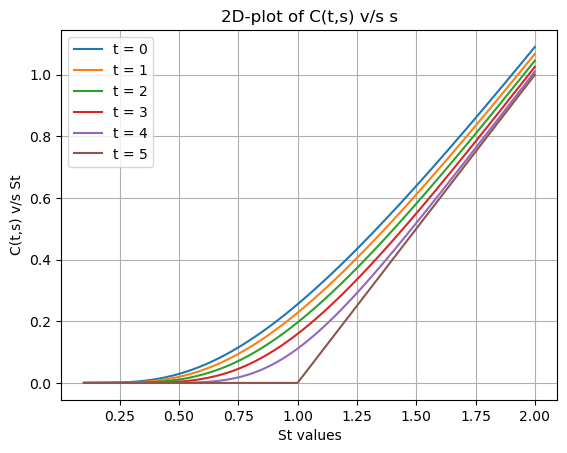

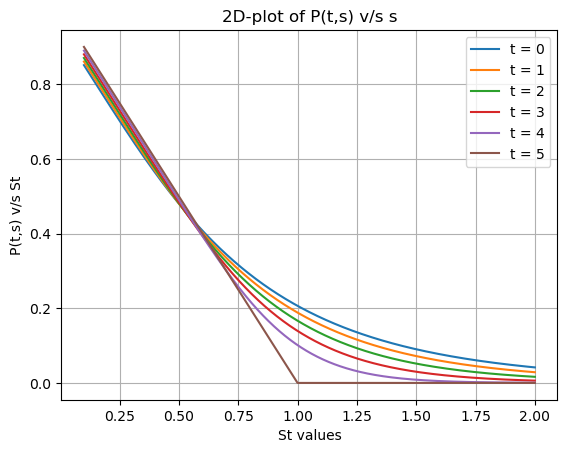

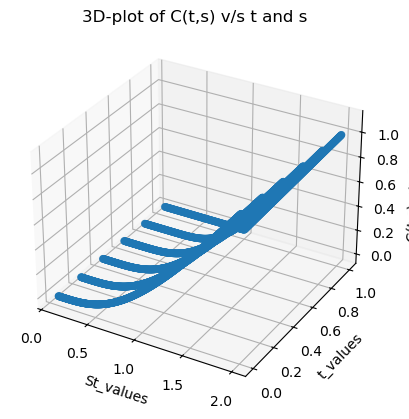

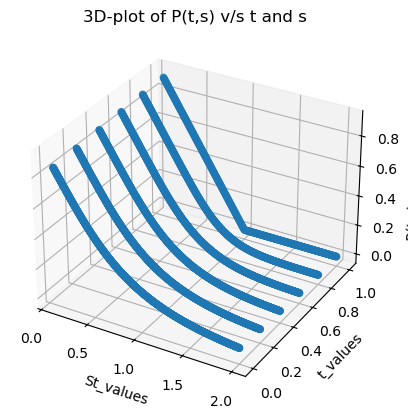

In [91]:
T = 1
K = 1
r = 0.05
sigma = 0.6
t_vals = [0,0.2,0.4,0.6,0.8,1]
St_vals = np.linspace(0.1,2,1000)
call_list, put_list = [],[]

for t in t_vals:
    call_price ,put_price = [],[]
    for St in St_vals:
        call,put = bsm_price(St,t,T,K,r,sigma)
        call_price.append(call)
        put_price.append(put)
        
    call_list.append(call_price)
    put_list.append(put_price)
  
plot_2d(St_vals,t_vals,call_list,"C(t,s) v/s St", "2D-plot of C(t,s) v/s s")
plot_2d(St_vals,t_vals,put_list,"P(t,s) v/s St", "2D-plot of P(t,s) v/s s")

plot_3d(St_vals,t_vals,call_list, "C(t,s) v/s St and t", "3D-plot of C(t,s) v/s t and s")
plot_3d(St_vals,t_vals,put_list, "P(t,s) v/s St and t", "3D-plot of P(t,s) v/s t and s")


In [111]:
def plot_3DSurface(St_values, t_values, prices_array, zlabel, title_str):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(St_values, t_values, prices_array, cmap='ocean_r')

    fig.colorbar(surf)
    ax.set_xlabel('Stock Price (St)')
    ax.set_ylabel('Time (t)')
    ax.set_zlabel(zlabel)
    ax.set_title(title_str)

    plt.show()

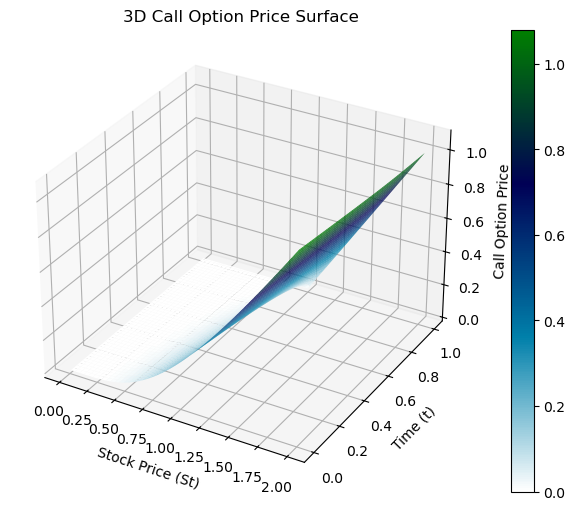

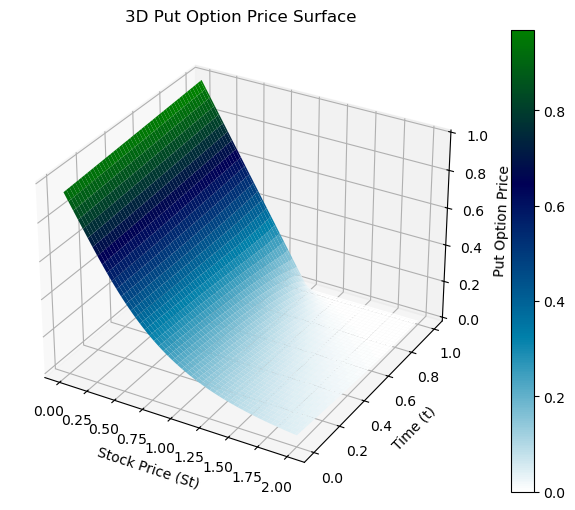

In [117]:
def q3():
    St_vals = np.linspace(0.01, 2, 100)
    t_vals = np.linspace(0, 1, 100)
    call_list, put_list = [],[]
    
    St_vals, t_vals = np.meshgrid(St_vals, t_vals)  
    rows = len(St_vals)
    cols = len(St_vals[0])
    
    for i in range(rows):
        call_row, put_row = [],[]
        for j in range(cols):
            call,put = bsm_price(St_vals[i][j], t_vals[i][i], T,K,r,sigma)
            call_row.append(call)
            put_row.append(put)
        call_list.append(call_row)
        put_list.append(put_row)

    call_list = np.array(call_list)
    put_list = np.array(put_list)


    plot_3DSurface(St_vals, t_vals, call_list, "Call Option Price", "3D Call Option Price Surface")
    plot_3DSurface(St_vals, t_vals, put_list, "Put Option Price", "3D Put Option Price Surface")

q3()